In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Text(0.5, 1.0, 'Halos in 1" ')

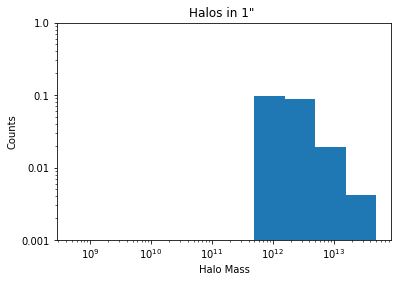

In [36]:
masses = np.load('halo_masses5.npy')
bins = np.logspace(np.log10(5e8),np.log10(5e13),11)
plt.hist(masses, bins=bins, log=True)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.logspace(2,5,4), labels=np.logspace(2,5,4)/1e5)
plt.title('Halos in 1" ')

Text(0.5, 1.0, 'Halos in 1" with theta_E>0.1')

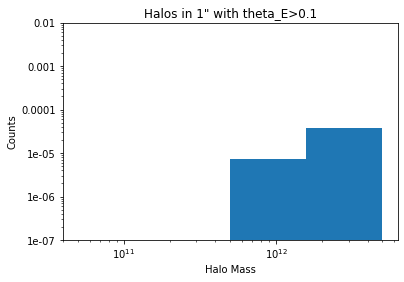

In [37]:
theta_Es = np.load('halo_thetaE5.npy')
bins = np.logspace(np.log10(5e10),np.log10(5e12),5)
plt.hist(masses[theta_Es>0.1], bins=bins, log=True)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.logspace(0,5,6), labels=np.logspace(0,5,6)/1e7)
plt.title('Halos in 1" with theta_E>0.1')

Text(0.5, 1.0, 'Halos in 1" with theta_E>0.02')

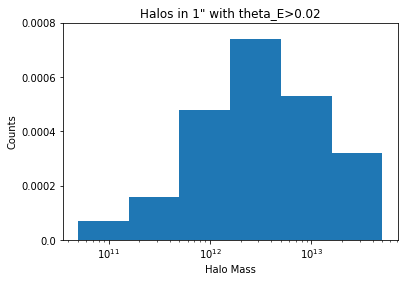

In [4]:
# fig, axs = plt.subplots(2,2, figsize=(12, 8))

theta_Es = np.load('halo_thetaE5.npy')
bins = np.logspace(np.log10(5e10),np.log10(5e13),7)
plt.hist(masses[theta_Es>0.02], bins=bins, log=False)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.linspace(0,80,5), labels=np.linspace(0,80,5)/1e5)
plt.title('Halos in 1" with theta_E>0.02')

Text(0.5, 1.0, 'Halos in 1" ')

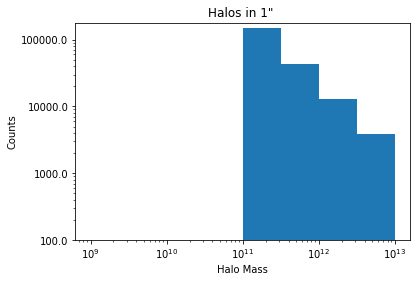

In [35]:
masses = np.load('halo_masses.npy')
bins = np.logspace(9,13,9)
plt.hist(masses, bins=bins, log=True)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.logspace(2,5,4), labels=np.logspace(2,5,4))
plt.title('Halos in 1" ')

Text(0.5, 1.0, 'Halos in 1" with theta_E>0.1')

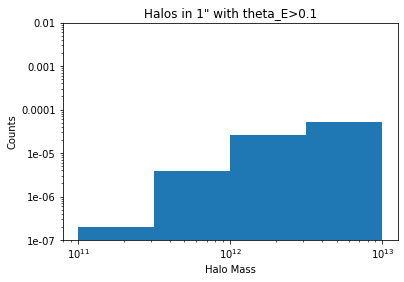

In [34]:
theta_Es = np.load('halo_thetaE.npy')
bins = np.logspace(11,13,5)
plt.hist(masses[theta_Es>0.1], bins=bins, log=True)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.logspace(0,5,6), labels=np.logspace(0,5,6)/1e7)
plt.title('Halos in 1" with theta_E>0.1')

Text(0.5, 1.0, 'Halos in 1" with theta_E>0.1')

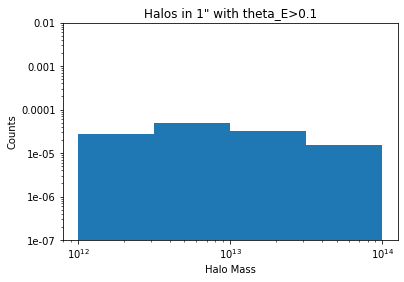

In [39]:
bins = np.logspace(12,14,5)
plt.hist(masses[theta_Es>0.1], bins=bins, log=True)
plt.xscale('log')
plt.xlabel('Halo Mass')
plt.ylabel('Counts')
plt.yticks(np.logspace(0,5,6), labels=np.logspace(0,5,6)/1e7)
plt.title('Halos in 1" with theta_E>0.1')

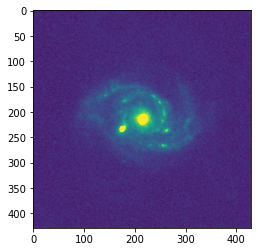

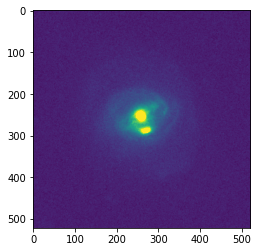

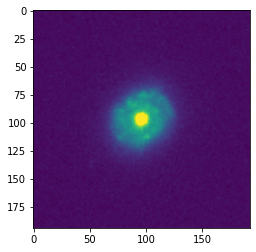

In [73]:
plt.figure()
im = np.load('../datasets/cosmos/COSMOS_23.5_training_sample/npy_files/img_548.npy')
plt.imshow(im, vmax=.15)
plt.figure()
im = np.load('../datasets/cosmos/COSMOS_23.5_training_sample/npy_files/img_4569.npy')
plt.imshow(im, vmax=.15)
plt.figure()
im = np.load('../datasets/cosmos/COSMOS_23.5_training_sample/npy_files/img_7731.npy')
plt.imshow(im, vmax=.3)

In [168]:
with fits.open('/Users/ethansilver/Downloads/h_udf_wfc_i_drz_img.fits') as hdul:
    print(hdul.info())
    data2 = hdul[0].data
    header2 = hdul[0].header

Filename: /Users/ethansilver/Downloads/h_udf_wfc_i_drz_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   14390   (10500, 10500)   float32   
None


In [115]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                10500 / Axis length                                    
NAXIS2  =                10500 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '16:45:38 (05/03/2004)'                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2004-03-03T06:49:56'                                                 
IRAF-MAX=           0.000000E0  /  DATA MAX                                     
IRAF-MIN=           0.000000E0  /  DATA MIN                                     
FILETYPE= 'SCI      '          / type of data found in data file                
                            

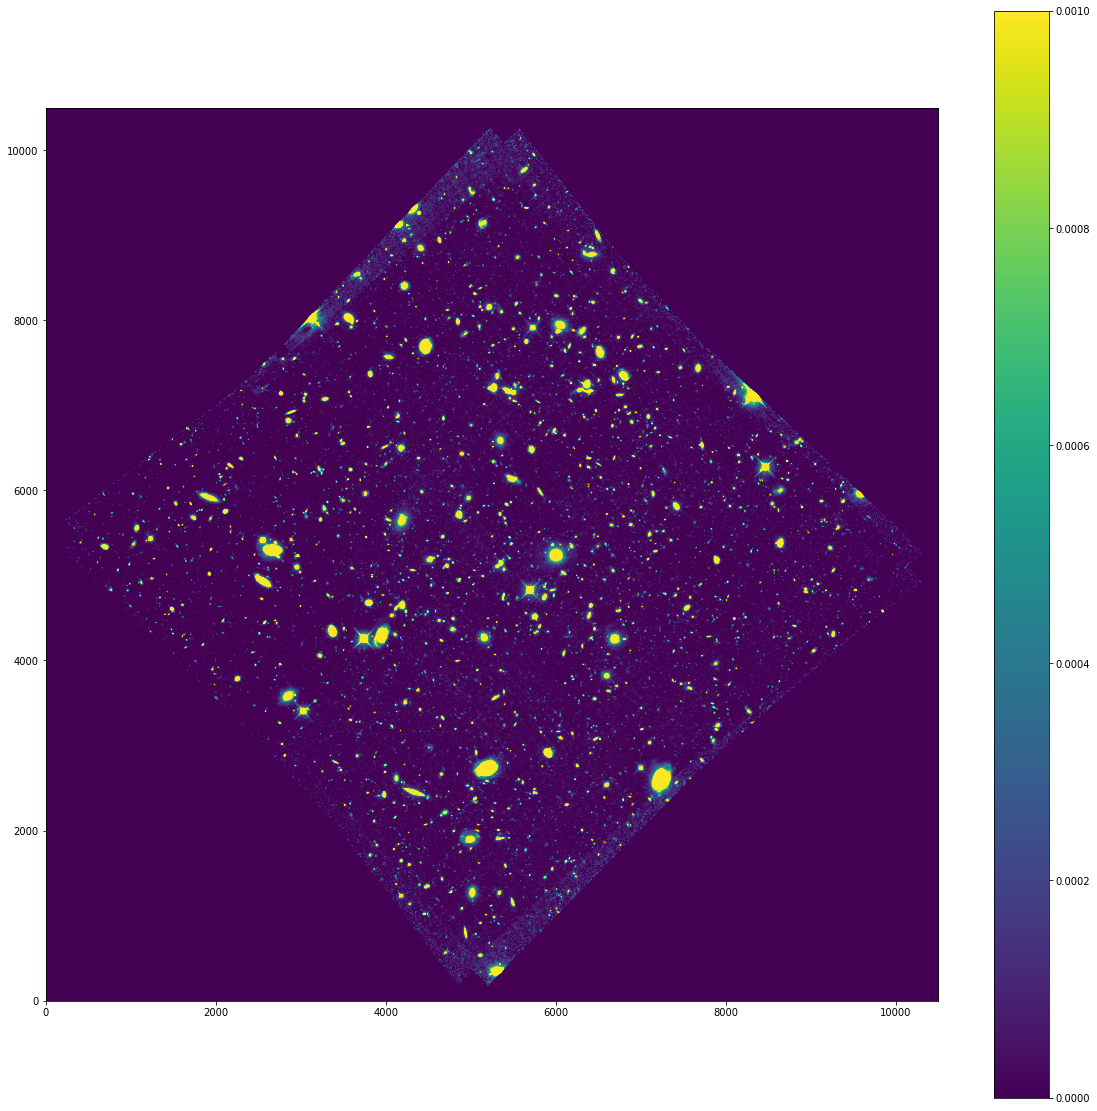

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(data, vmin=0, vmax=.001, origin="lower")
plt.colorbar()

In [134]:
CRVAL1 =  53.122751
CRVAL2 = -27.805089
CRPIX1 =  9470.5
CRPIX2 =  3610.5
#.03" per pixel
def dec_(y):
    return (y-5250)*.03/3600-(27+47/60+29.1/3600)
def ra_(x):
    return -(x-5250)*.03/3600+(3+32/60+39.0/3600)*15
def y_(dec):
    return (dec+27+47/60+29.1/3600)*3600/.03+5250
def x_(ra):
    return ((3+32/60+39.0/3600)*15-ra)*3600/.03+5250

ra_(5250), dec_(5250)

(53.162499999999994, -27.791416666666667)

4469 4903


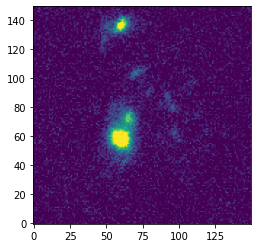

In [166]:
ra = (3+32/60+36.625/3600)*15
dec = -27-47/60-50.06/3600
ra = (3+32/60+40.56/3600)*15
dec = -27-47/60-39.48/3600
# ra = 53.1630062
# dec = -27.8124982
x = int(x_(ra))
y = int(y_(dec))
print(x,y)
plt.imshow(data[y-75:y+75,x:x+150], vmin=0, vmax=.003, origin="lower")

4469 4903


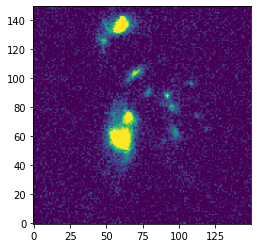

In [169]:
ra = (3+32/60+36.625/3600)*15
dec = -27-47/60-50.06/3600
ra = (3+32/60+40.56/3600)*15
dec = -27-47/60-39.48/3600
# ra = 53.1630062
# dec = -27.8124982
x = int(x_(ra))
y = int(y_(dec))
print(x,y)
plt.imshow(data2[y-75:y+75,x:x+150], vmin=0, vmax=.003, origin="lower")

In [187]:
hdu = fits.PrimaryHDU(data[y-75:y+75,x:x+150])
np.save('../datasets/UDF/4110z.npy', data[y-75:y+75,x:x+150])
hdu2 = fits.PrimaryHDU(data2[y-75:y+75,x:x+150])
np.save('../datasets/UDF/4110i.npy', data2[y-75:y+75,x:x+150])


In [142]:
ra = (3+32/60+39.0/3600)*15
dec = -27-47/60-29.1/3600
x_(53.1630062), y_(-27.8124982)

(5189.255999999546, 2720.215999999965)

In [137]:
(dec+27.7941667)*3600/.03

330.00400000020136

In [138]:
27+47/60+29.1/3600

27.791416666666667

In [139]:
ra_(9470.5), dec_(3610.5)

(53.12732916666666, -27.805079166666665)